## Reuter Example

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10] 

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
train_data.shape

(8982,)

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Data preparation

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [43]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_lables = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# keras one-hot 내장함수

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Modeling

In [17]:
from keras import models 
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# 3개의 Dense layer 를 추가해보세요. 
# 첫번째 레이어는 64개의 뉴런 
# 두번째 레이어는 64개의 뉴런 
# 세번째 레이어는 46개의 뉴런 (마지막층) 

In [18]:
# 모델 컴파일 코드를 추가해보세요.
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy'
             ,metrics=['accuracy'])

## Validataion set

In [19]:
#코드를 추가해보세요.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training

In [20]:
#코드를 추가해보세요.
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 173us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 2s 299us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0487 - acc: 0.7700 - val_loss: 1.1180 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.8245 - acc: 0.8281 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.6598 - acc: 0.8641 - val_loss: 0.9689 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.5252 - acc: 0.8935 - val_loss: 0.9202 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.4288 - acc: 0.9117 - val_loss: 0.9108 - val_acc: 0.8040


# 시각화

In [50]:
import matplotlib.pyplot as plt

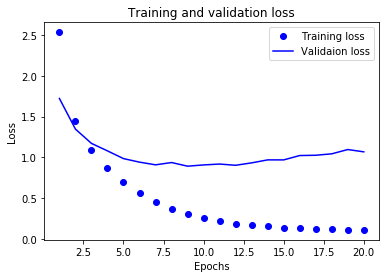

In [51]:
#코드를 추가해보세요.

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

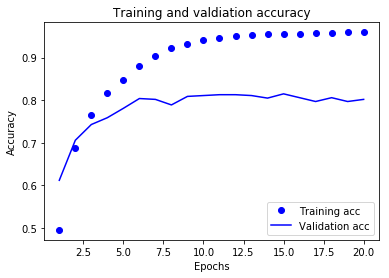

In [53]:
#코드를 추가해보세요.

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and valdiation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Modeling (epoch = 9)

In [59]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 290us/step - loss: 2.4777 - acc: 0.5273 - val_loss: 1.6362 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 2s 198us/step - loss: 1.3466 - acc: 0.7186 - val_loss: 1.2585 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 2s 201us/step - loss: 1.0070 - acc: 0.7902 - val_loss: 1.1432 - val_acc: 0.7370
Epoch 4/9
7982/7982 [==============================] - 1s 176us/step - loss: 0.8023 - acc: 0.8291 - val_loss: 1.0153 - val_acc: 0.7870
Epoch 5/9
7982/7982 [==============================] - 1s 187us/step - loss: 0.6366 - acc: 0.8659 - val_loss: 0.9874 - val_acc: 0.8080
Epoch 6/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.5114 - acc: 0.8911 - val_loss: 0.9353 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 2s 202us/step - loss: 0.4113 - acc: 0.9108 - val_loss: 0.9236 - val_acc: 0.8010
Epoch 8

In [60]:
results

[0.9779827365467618, 0.7836153161440804]

In [61]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1767586821015138

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.182546749777382

# Prediction

In [62]:
predictions = model.predict(x_test)

In [63]:
predictions[0].shape

(46,)

In [64]:
np.sum(predictions[0])

0.99999994

In [65]:
np.argmax(predictions[0])

3

## 레이블과 손실을 다루는 다른 방법
 정수 텐서로 변환하여 레이블을 인코딩

In [67]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [68]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

## 충분히 큰 중간층을 두어야 하는 이유

앞서 언급한 것처럼 마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안 됩니다. 46차원보다 훨씬 작은 중간층(예를 들면 4차원)을 두면 정보의 병목이 어떻게 나타나는지 확인해 보겠습니다.

In [69]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 216us/step - loss: 2.7811 - acc: 0.4248 - val_loss: 1.9779 - val_acc: 0.6000
Epoch 2/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.6326 - acc: 0.6285 - val_loss: 1.5067 - val_acc: 0.6260
Epoch 3/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.3167 - acc: 0.6518 - val_loss: 1.4039 - val_acc: 0.6420
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.1657 - acc: 0.6765 - val_loss: 1.3557 - val_acc: 0.6560
Epoch 5/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.0444 - acc: 0.7194 - val_loss: 1.3290 - val_acc: 0.6960
Epoch 6/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.9498 - acc: 0.7552 - val_loss: 1.3144 - val_acc: 0.6950
Epoch 7/20
7982/7982 [==============================] - 2s 227us/step - loss: 0.8703 - acc: 0.7694 - val_loss: 1.3305 - val_acc: 0.6970


검증 정확도의 최고 값은 약 71%로 8% 정도 감소되었습니다. 이런 손실의 대부분 원인은 많은 정보(46개 클래스의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.